# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: model의 예측 값
- $x$: feature
- $w$: weight, 회귀계수(regression coefficient). feature가 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 편향
- $p$: p 번째 feature / p번째 weight
- $i$: i번째 관측치 (sample)

### Boston DataSet
보스톤의 지역별 집값 데이터셋

 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)


#### Boston housing dataset loading

In [159]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [160]:
# dataframe으로 만들기
cols = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
df = pd.DataFrame(X, columns=cols)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [6]:
# 필요한 것 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data 관련
from sklearn.model_selection import train_test_split

# data preprocessing 관련
from sklearn.preprocessing import StandardScaler

# model 관련
from sklearn.linear_model import LinearRegression

# evaluatino index 관련
from metrics import print_metrics_reression as pmr

##### train/test set 나누기

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Feature scaling

In [162]:
# categorical feature(CHAS)는 제외하고 feature scaling 처리한다.
chas_train = X_train[:, 3].reshape(-1, 1)
chas_test = X_test[:, 3].reshape(-1, 1)

In [163]:
# X_train과 X_test에서 CHAS feature 값을 제거한다.
X_train = np.delete(X_train, 3, axis = 1)
X_test = np.delete(X_test, 3, axis = 1)

In [164]:
# feature scaling처리를 한다.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
# 미리 빼두었던 CHAS data와 위의 scaling처리된 data를 합친다.
X_train_preprocessed = np.append(X_train_scaled, chas_train, axis = 1)
X_test_preprocessed = np.append(X_test_scaled, chas_test, axis = 1)

##### 모델 생성, 학습

In [75]:
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

LinearRegression()

In [23]:
# weight와 bias 확인
lr.coef_

array([ -1.01725764,   1.05897976,   0.14057081,   2.6182873 ,
        -0.05984564,  -2.92192314,   2.30823936,  -2.07662326,
        -2.36002201,   0.77266028,  -3.60435664, -16.28955224])

In [24]:
lr.intercept_

31.667009418536313

In [25]:
X_train_preprocessed[0] @ lr.coef_ + lr.intercept_

30.549114138699

In [26]:
y_train[0]

26.7

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

##### 평가

In [27]:
pred_train = lr.predict(X_train_preprocessed)
pred_test = lr.predict(X_test_preprocessed)

pmr(y_train, pred_train, title = 'train data set에 대한 평가')
print('=' * 50)
pmr(y_test, pred_test, title = 'test data set에 대한 평가')

train data set에 대한 평가
MSE: 19.660
RMSE: 4.434
MAE: 3.127
R^2: 0.769
test data set에 대한 평가
MSE: 34.212
RMSE: 5.849
MAE: 3.839
R^2: 0.580


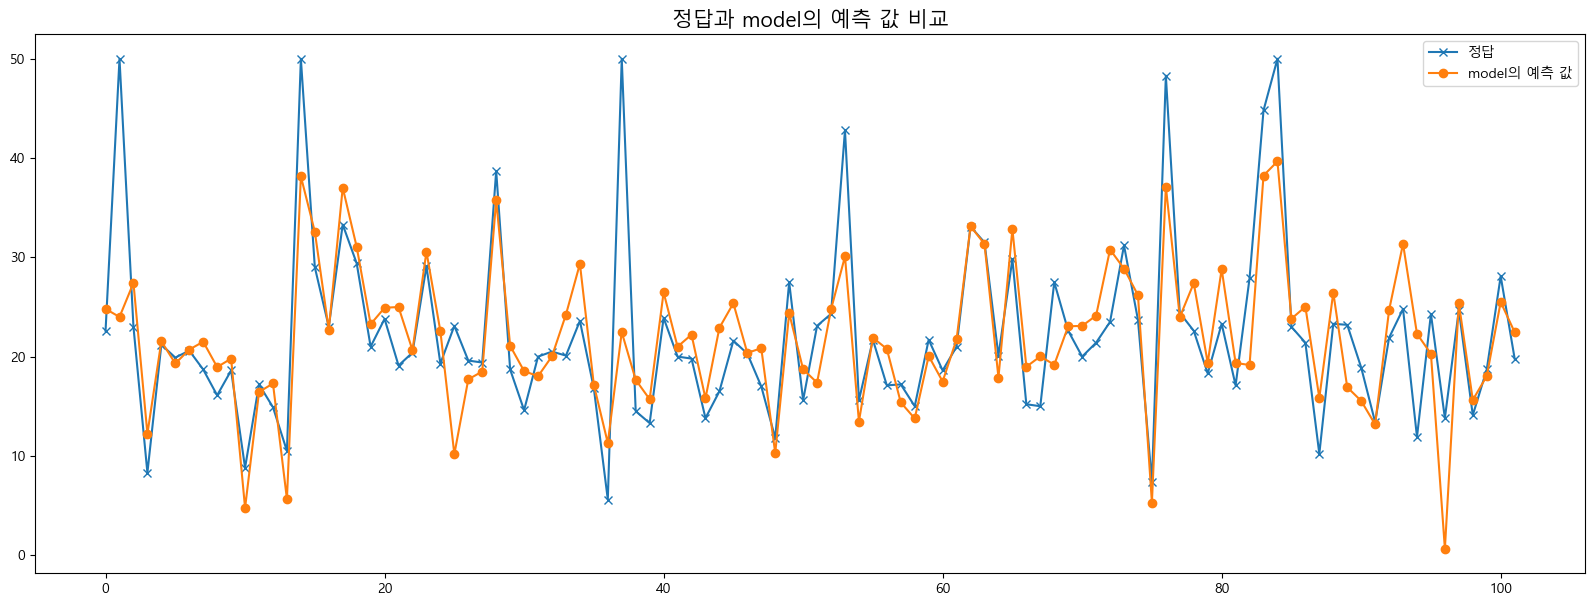

In [28]:
# data set과 model의 예측 값을 visualization해보자.
import matplotlib.pyplot as plt

x = range(len(y_test))

plt.figure(figsize = (20, 7))

plt.plot(x, y_test, marker = 'x', label = '정답')
plt.plot(x, pred_test, marker = 'o', label = 'model의 예측 값')

plt.title('정답과 model의 예측 값 비교', fontsize = 15)
plt.legend()
plt.show()

# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 파라미터(Coef, weight)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [ ]:
# 임의의 data set을 만든다.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# 함수를 설정한다. x^2 + x + 2에 표준 정규 분포를 따르는 noise를 더한다.
def func(X):
    return X**2 + X + 2 + np.random.normal(0, 1, size = (X.size, 1))

# 생성할 data의 개수 m
m = 100

X = 6 * np.random.rand(m, 1) - 3
y = func(X)
y = y.flatten()

print(X.shape, y.shape)

(100, 1) (100,)


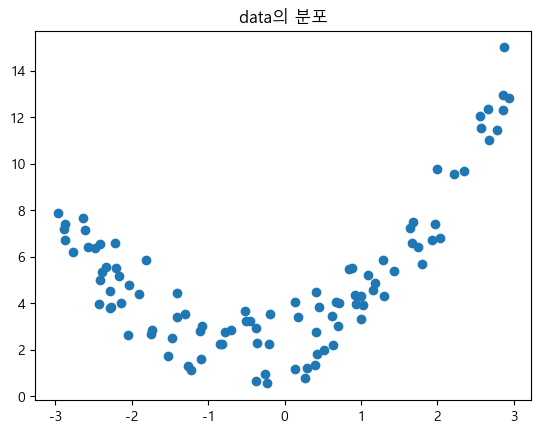

In [30]:
# 위 data set을 그래프로 그려본다.
plt.scatter(X, y)
plt.title('data의 분포')
plt.show()

In [43]:
# 위 data는 비선형 data이다. 이 data에 linear regression을 적용하면 예측이 정확하지 못할 것이다.

##### 모델생성, 학습

In [31]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)
pmr(y, pred)

MSE: 7.729
RMSE: 2.780
MAE: 2.322
R^2: 0.191


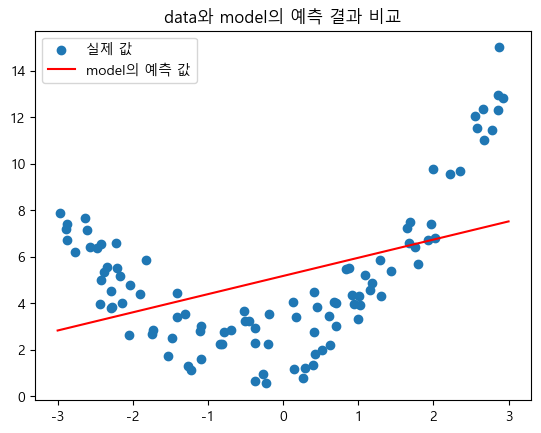

In [32]:
# data와 model의 예측 결과를 plotting해 둘을 비교해보자.
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
pred_new = lr.predict(X_new)

plt.scatter(X, y, label = '실제 값')
plt.plot(X_new, pred_new, color = 'red', label = 'model의 예측 값')

plt.title('data와 model의 예측 결과 비교')
plt.legend()
plt.show()

In [ ]:
# 결과를 보면 알 수 있듯 model의 예측 값과 실제 값의 오차가 매우 크다는 것을 알 수 있다.
# 이는 model의 성능이 아주 떨어진다고 판단할 수 있다.
# 왜 이런 상황이 생긴 것일까?
# data set은 비선형이지만 linear regression은 무조건 선형으로 값을 예측하기 때문이다.
# 이는 underfitting이 발생했다고 말할 수 있다.
# underfitting을 해결할 수 있는 것이 Polynomial Regression이다.
# LinearRegression model 자체로는 해결할 수 없다. 그래서 feature를 추가한 data를 만들고 이를 model에게 학습시킨다.
# feature를 제곱한 새로운 feature를 만들어 추가하면 문제가 해결될 것이다.

##### PolynomialFeatures를 이용해 다항회귀구현

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# parameter
# degree
    # 몇 제곱까지 feature를 제곱할지 설정한다.
    # ex) degree = 3 -> X, X^2 X^3을 가지는 feature를 생성한다.
# include_bias
    # bias에 곱해질 값을 생성할지 결정한다.
    # include_bias = True
        # 기본값이다.
        # bias에 곱해질 값을 생성한다. 모든 값이 1로 구성된 feature를 생성한다.
    # include_bias = True
        # bias에 곱해질 값을 생성하지 않는다.

In [35]:
# 기존 feature에 n제곱한 값을 가지는 feature들과 기존 feature끼리 곱한 값을 가지는 feature들을 추가한다.
pn = PolynomialFeatures(degree = 2, include_bias = False)

X_poly = pn.fit_transform(X)

In [36]:
# PolynomialFeatures 처리를 한 X_poly 값을 확인해보자.
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [37]:
# 실행 결과 보이는 것과 같이 기존 feature와 feature에 제곱을 한 새로운 feature로 구성된 data가 생성되었다.

In [38]:
# 변환한 feature들의 이름을 조회해보자. 즉 feature가 어떻게 만들어졌는지 확인하는 것이다.
pn.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [39]:
# 첫 번째 column은 x0 즉 원본이고, 두 번째 column은 x0를 제곱한 것이다.

##### LinearRegression 모델을 이용해 평가

In [40]:
# 이때 model을 학습시킬 때 PolynomialFeatures를 처리한 X와 기존의 y를 이용한다.

In [41]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

LinearRegression()

In [42]:
# 평가
# 평가를 할 때 역시 PolynomialFeatures를 처리한 X를 사용한다.
pred_poly = lr_poly.predict(X_poly)
pmr(y, pred_poly, title = 'PolynomialFeatures 처리 후')

PolynomialFeatures 처리 후
MSE: 0.974
RMSE: 0.987
MAE: 0.828
R^2: 0.898


In [43]:
# PolynomialFeatures를 처리하지 않았던 model과의 비교
pmr(y, pred, title = 'PolynomailFeatures 처리 전')
print('-' * 50)
pmr(y, pred_poly, title = 'PolynomialFeatures 처리 후')

PolynomailFeatures 처리 전
MSE: 7.729
RMSE: 2.780
MAE: 2.322
R^2: 0.191
--------------------------------------------------
PolynomialFeatures 처리 후
MSE: 0.974
RMSE: 0.987
MAE: 0.828
R^2: 0.898


In [ ]:
# PolynomialFeatures를 처리하니 error는 작아지고 R^2은 1에 가까워졌다는 것을 확인할 수 있다.

##### 시각화

In [71]:
# 기존 data set과 PolynomialFeatures를 처리한 data를 학습한 model의 예측 결과를 비교해보자.

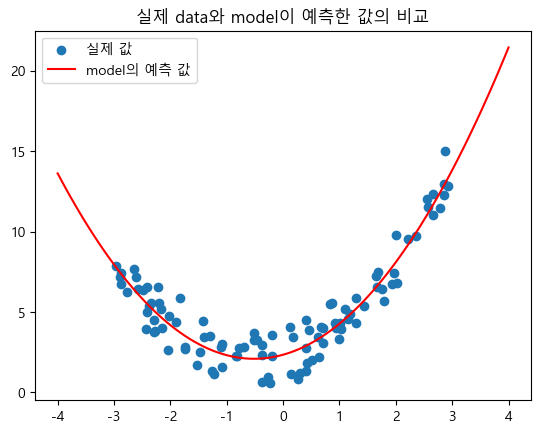

In [44]:
X_new = np.linspace(-4, 4, 100).reshape(-1, 1)
X_new_poly = pn.transform(X_new)
y_new = lr_poly.predict(X_new_poly)

plt.scatter(X, y, label = '실제 값')
plt.plot(X_new, y_new, color = 'red', label = 'model의 예측 값')

plt.title('실제 data와 model이 예측한 값의 비교')
plt.legend()
plt.show()

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [46]:
pn_degree_up = PolynomialFeatures(degree = 30, include_bias = False)
X_poly_degree_up = pn_degree_up.fit_transform(X)

In [47]:
lr_poly_degree_up = LinearRegression()
lr_poly_degree_up.fit(X_poly_degree_up, y)
pred_poly_degree_up = lr_poly_degree_up.predict(X_poly_degree_up)
pmr(y, pred_poly_degree_up)

MSE: 1.443
RMSE: 1.201
MAE: 0.948
R^2: 0.849


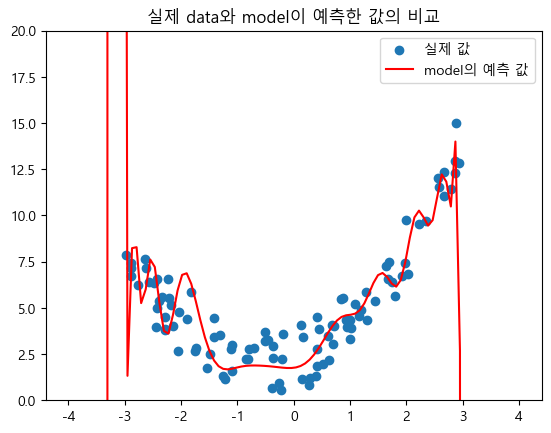

In [48]:
X_new = np.linspace(-4, 4, 100).reshape(-1, 1)
X_new_poly_degree_up = pn_degree_up.transform(X_new)
y_new = lr_poly_degree_up.predict(X_new_poly_degree_up)

plt.scatter(X, y, label = '실제 값')
plt.plot(X_new, y_new, color = 'red', label = 'model의 예측 값')

plt.title('실제 data와 model이 예측한 값의 비교')
plt.legend()
plt.ylim(0, 20)
plt.show()

In [ ]:
# 보이는 것과 같이 dgree를 올린다고 해서 무조건 좋은 것은 아니다.
# 차원이 높아질수록 최대한 data set에 맞춰서 model이 예측하고자 한다.
# train data set에 대한 성능은 높아질 수 있지만 train data set의 범위를 벗어난 data에 대해서는 오차가 굉장히 커질 수 있다.
# 즉 overfitting이 발생하는 것이다.

In [ ]:
# PolynomialFeatures를 사용할 때는 적당한 degree를 찾는 것이 중요하다.
# degree가 너무 작으면 즉 feature의 수가 충분하지 못하다면 underfitting이 발생하고
# degree가 너무 크면 즉 feature의 수가 너무 많으면 overfitting이 발생한다.

### PolynomialFeatures 예제

In [49]:
import numpy as np

In [51]:
data = np.arange(12).reshape(4, 3)
print(data.shape)
data

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# PolynomialFeatures instance를 생성한다. 이때 dgree = 2를 입력한다.
pn_2 = PolynomialFeatures(degree = 2)

# 위에서 생성한 instance로 data를 fit_transform한다.
data_poly_2 = pn_2.fit_transform(data)

# PolynomialFeatures 처리한 data의 shape을 확인해본다.
data_poly_2.shape

(4, 10)

In [58]:
# 원본 data는 feature가 3개밖에 없었다. 이처럼 feature가 여러 개인 data에 PolynomialFeatures 처리를 하면 
# feature끼리의 곱을 feature로 설정한 feature가 생성된다.
# 이를 직접 확인해보자.
pn_2.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [55]:
# 위와 같이 기존에 있던 feature를 제곱한 feature과 각 feature들끼리 곱한 feature가 생겼다.
# 또 PolynoamilFeatures instance를 생성할 때 include_bias를 False로 설정하지 않아 숫자 1로만 이루어진 feature가
# 제일 첫 번째 column에 생성되었다는 것을 확인할 수 있다.

In [59]:
# 이번에는 degree = 3을 입력해보자.
pn_3 = PolynomialFeatures(degree = 3)
data_poly_3 = pn_3.fit_transform(data)
data_poly_3.shape

(4, 20)

In [60]:
pn_3.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3'], dtype=object)

In [ ]:
# 위와 같이 degree = 3으로 했을 때 기존 feature를 제곱한 것들의 교차곱을 나타내는 feature가 생성되었다.
# degree를 키울수록 새로 생성되는 feature의 수는 기하급수적으로 늘어난다.

### PolynomialFeatures를 Boston Dataset에 적용

In [95]:
# 필요한 것 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data 관련
from sklearn.model_selection import train_test_split

# data preprocessing - feature scaling 관련
from sklearn.preprocessing import StandardScaler

# data preprocessing - PolynomialFeatures 관련
from sklearn.preprocessing import PolynomialFeatures

# model 관련
from sklearn.linear_model import LinearRegression

# evaluation index 관련
from metrics import print_metrics_reression as pmr

In [166]:
# data 생성
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [167]:
# data scaling
# Feature scaling

# categorical feature(CHAS)는 제외하고 feature scaling 처리한다.
chas_train = X_train[:, 3].reshape(-1, 1)
chas_test = X_test[:, 3].reshape(-1, 1)

# X_train과 X_test에서 CHAS feature 값을 제거한다.
X_train = np.delete(X_train, 3, axis = 1)
X_test = np.delete(X_test, 3, axis = 1)

# feature scaling처리를 한다.
scaler = StandardScaler()
X_train_temp = scaler.fit_transform(X_train)
X_test_temp = scaler.transform(X_test)

# 미리 빼두었던 CHAS data와 위의 scaling처리된 data를 합쳐 scaling된 data를 만든다.
X_train_scaled = np.append(X_train_temp, chas_train, axis = 1)
X_test_scaled = np.append(X_test_temp, chas_test, axis = 1)

In [107]:
# PolynomialFeatures를 처리하기 전에 먼저 scaling처리까지만 된 data로 model을 학습시키고 성능을 평가해보자.
# model 생성 및 학습
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# model의 예측 결과 생성
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

# model 평가
pmr(y_train, pred_train, 'train data set에 대한 model의 성능')
print('=' * 50)
pmr(y_test, pred_test, 'test data set에 대한 model의 성능')

train data set에 대한 model의 성능
MSE: 19.660
RMSE: 4.434
MAE: 3.127
R^2: 0.769
test data set에 대한 model의 성능
MSE: 34.212
RMSE: 5.849
MAE: 3.839
R^2: 0.580


In [61]:
# 이번에는 PolynomialFeatures를 boston housing data set에 적용시켜보자.

In [168]:
# 먼저 PolynomialFeatures instance를 생성한다.
pn_boston = PolynomialFeatures(degree = 2, include_bias = False)

# 위 instance를 이용해 scaling된 data에 PolynomialFeatures 처리를 한다.
X_train_scaled_poly = pn_boston.fit_transform(X_train_scaled)
X_test_scaled_poly = pn_boston.fit_transform(X_test_scaled)

In [169]:
# PolynomialFeatures를 처리한 data의 shape을 기존 data와 비교해보자.
X_train_scaled.shape, X_test_scaled_poly.shape

((404, 13), (102, 104))

In [ ]:
# feature의 수가 12에서 90으로 늘어났다는 것을 확인할 수 있다.

##### 모델 생성 학습 추론 평가

In [170]:
# model 생성
lr_poly = LinearRegression()

# model 학습
lr_poly.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [171]:
pred_train_poly = lr_poly.predict(X_train_scaled_poly)
pred_test_poly = lr_poly.predict(X_test_scaled_poly)

In [172]:
pmr(y_train, pred_train_poly, 'PolynomialFeatures 처리 후 train data set에 대한 성능')
print('=' * 50)
pmr(y_test, pred_test_poly, 'PolynomialFeatures 처리 후 test data set에 대한 성능')

PolynomialFeatures 처리 후 train data set에 대한 성능
MSE: 4.340
RMSE: 2.083
MAE: 1.617
R^2: 0.949
PolynomialFeatures 처리 후 test data set에 대한 성능
MSE: 31.278
RMSE: 5.593
MAE: 3.328
R^2: 0.616


In [ ]:
# PolynomialFeatures를 처리하기 전의 model의 성능과 비교해보자.

In [173]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

pmr(y_train, pred_train, title = 'PolynomialFeatures 처리 전 train data set에 대한 평가')
print('=' * 50)
pmr(y_test, pred_test, title = 'PolynomialFeatures 처리 전 test data set에 대한 평가')

ValueError: X has 13 features, but LinearRegression is expecting 12 features as input.

In [77]:
# error는 작아졌고, R^2은 1에 더 가까워졌다. 즉 PolynomialFeatures 처리를 해 model의 성능이 좋아졌다.

In [114]:
# 이번에는 degree = 5로 바꿔보자.
pn_boston_5 = PolynomialFeatures(degree = 5, include_bias = False)

X_train_scaled_poly_5 = pn_boston_5.fit_transform(X_train_scaled)
X_test_scaled_poly_5 = pn_boston_5.fit_transform(X_test_scaled)

# model 생성
lr_poly_5 = LinearRegression()

# model 학습
lr_poly_5.fit(X_train_scaled_poly_5, y_train)

pred_train_5 = lr_poly_5.predict(X_train_scaled_poly_5)
pred_test_5 = lr_poly_5.predict(X_test_scaled_poly_5)

pmr(y_train, pred_train_5, 'train data set에 대한 성능')
print('=' * 50)
pmr(y_test, pred_test_5, 'test data set에 대한 성능')

train data set에 대한 성능
MSE: 0.000
RMSE: 0.000
MAE: 0.000
R^2: 1.000
test data set에 대한 성능
MSE: 158850.739
RMSE: 398.561
MAE: 59.754
R^2: -1949.802


In [ ]:
# train data set에 대한 model의 성능은 완벽해졌다. error는 0이 되고, R^2은 1이 되었다.
# 하지만 test data set에 대한 model의 성능은 굉장히 좋지 않다.
# 위와 같은 경우는 model이 train data set에 너무 지나치게 맞춰서 학습한 것이다. 즉 overfitting이 발생한 것이다.
# PolynomialFeatures를 할 때는 이런 경우를 유의해야 한다. model이 data set의 일반적인 특성을 학습하도록 해야 한다.

In [ ]:
# overfitting이 발생했을 때 문제를 해결할 수 있는 방법이 Regularization이다.

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

- loss function에 대한 이해


- linear regression을 하는 model들은 모두 loss function이라는 것을 이용해 data를 학습하고 weight을 구해 하나의 식을 도출한다. 그리고 이 식을 이용해 다른 data에 대한 값을 예측하는 것이다.
- 우리가 앞에서 배웠던 LinearRegression model은 loss function으로 단순히 MSE 함수를 사용한다.
- 하지만 우리가 지금부터 배울 Lasso / Ridge / ElasticNet model은 MSE 함수에 하나의 항이 더해진 식을 loss function으로 사용한다.

- 각 model의 loss function은 아래와 같다.

- 각 model의 loss function에서는 MSE 함수를 사용하는데 MSE 함수를 사용하면 오차가 계산된다. 그리고 이 오차에 새로운 항을 더한다. 이 항을 규제항이라고 말한다. 이 과정을 통해 loss function은 오차를 더 크게 만든다.
- 오차는 작을수록 좋은 것인데 왜 loss function을 이용해 오차를 더 크게 만드는 것일까? 
- 우선 loss function을 보자. loss function에는 weight(w)이 변수로 설정되어 있다. 즉 loss function은 이 weight을 바꾸는 것에 그 목적이 있는 것이다.
- Lasso / Ridge / ElasticNet model은 내부적으로 loss function에 의해 계산된 오차를 작게 만들려고 한다. 그 방법으로 model은 weight을 바꾸는 것이다.
- loss function에 의해 오차가 커졌는데 loss function에 의해 계산된 오차를 낮추는 방법은 weight을 최대한 0에 가깝게 만드는 것이다.
- 즉 model이 data를 학습할 때 weight을 최대한 0에 가깝게 만드는 것이다. weight이 0에 가까워진다는 것은 feature의 영향력을 낮추는 것과 같다. 즉 overfitting이 발생한 regression model의 weight을 낮춰 model의 예측 값이 실제 값에 가까워지도록 하는 것이다.
- 이는 overfitting 뿐만이 아니라 underfitting 문제도 해결할 수 있다. 위 세 개의 model들은 hyper parameter로 alpha를 갖는다. loss function의 규제 항에는 alpha가 곱해져 있다. 이 alpha를 제어해 model이 weight

- alpha는 규제 강도라고 생각하면 된다.


- overfitting 해결: alpha를 크게 한다. 즉 규제를 약하게 해 model을 단순하게 만든다.
- undefitting 해결: alpha를 작게 한다. 즉 규제를 강하게 해 model을 복잡하게 만든다.

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{Ridege_loss_function}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제 값 사이의 차이(오차)를 정의하는 함수로 모델이 학습할 때 사용된다.<br>
> 평가 함수와는 다르다. loss funciton은 model이 학습을 할 때 사용하는 것이다.

- Ridge Regression은 loss function에 MSE 함수를 사용한다. MSE 함수를 이용하면 오차가 계산되는데 이 오차에 새로운 항을 더한다. 즉 loss function은 오차를 더 크게 만드는 것이다.
- 왜 일부러 오차를 더 키우는 것일까? 오차가 발생하는 원인은 weight 때문이다. model은 loss function에 의해 계산된 오차를 작게 만들기 위해 weight을 최대한 0에 가깝게 만들고자 한다.
- 왜 weight을 최대한 0에 가깝게 만들까? 우리는 지금 overfitting 문제를 해결하고자 한다. overfitting 문제는 feature의 수가 너무 많아 발생한다. 그래서 LinearRegression model을 만들 때 feature에 곱해지는 weight을 최대한 0에 가깝게 만들어서 model의 예측 값을 실제 값에 가깝게 만들고자 하는 것이다.
- feature를 없애지 않고 feature의 영향력을 낮추는 것이다. 이때 중요한 feature는 weight를 덜 낮추고 중요하지 않은 feature는 weight를 많이 낮춰서 자연스럽게 feature selection을 하는 효과를 낳는다.

- Ridge Resgression에서 weight는 절대 0이 되지는 않는다.





- overfitting이 발생하면 우리는 alpha를 조절해야 한다. alpha가 커지면 loss function에 의해 계산된 오차가 더 커진다. 이렇게 되면 model이 학습을 할 때 weight를 더 0에 가깝게 만들고자 할 것이다. 이를 통해 model이 예측한 값이 실제 값에 더 가까워질 것이다.





- regression model에서 오차는 작을수록 좋다. 하지만 오차가 너무 작은 것은 좋지 않다. model에 overfitting 문제가 발생했다는 뜻이기 때문이다. 그래서 일부러 오차를 키워 model의 성능을 낮추는 것이다.
- 쉽게 말해 너무 똑똑한 model을 덜 똑똑하게 만드는 것이다.
- 

In [115]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
# Ridge
    # parameter
        # alpha
            # 규제 항의 값을 조정하는 hyper parameter
            # 기본값은 1이다.
            # 값이 커질수록 regularization이 강해진다.
            # overfitting 발생
                # alpha를 크게 한다.
            # underfitting 발생
                # alpha를 작게 한다.

In [ ]:
# boston housing data set 사용

In [174]:
# RidgeRegression model에 대해 먼저 알아보자.
ridge = Ridge(random_state = 0)

ridge.fit(X_train_scaled, y_train)

pred_train = ridge.predict(X_train_scaled)
pred_test = ridge.predict(X_test_scaled)

print('alpha: 1')
print('=' * 50)
pmr(y_train, pred_train, 'train data set에 대한 model의 성능')
print('=' * 50)
pmr(y_test, pred_test, 'test data set에 대한 model의 성능')

alpha: 1
train data set에 대한 model의 성능
MSE: 19.328
RMSE: 4.396
MAE: 3.100
R^2: 0.773
test data set에 대한 model의 성능
MSE: 33.554
RMSE: 5.793
MAE: 3.843
R^2: 0.588


In [175]:
# alpha = 10을 입력한다.
ridge = Ridge(alpha = 10, random_state = 0)

ridge.fit(X_train_scaled, y_train)

pred_train = ridge.predict(X_train_scaled)
pred_test = ridge.predict(X_test_scaled)

print('alpha: 10')
print('=' * 50)
pmr(y_train, pred_train, 'train data set에 대한 model의 성능')
print('=' * 50)
pmr(y_test, pred_test, 'test data set에 대한 model의 성능')

alpha: 10
train data set에 대한 model의 성능
MSE: 19.430
RMSE: 4.408
MAE: 3.085
R^2: 0.772
test data set에 대한 model의 성능
MSE: 34.416
RMSE: 5.866
MAE: 3.845
R^2: 0.577


In [176]:
# alpha = 100을 입력한다.
ridge = Ridge(alpha = 100, random_state = 0)

ridge.fit(X_train_scaled, y_train)

pred_train = ridge.predict(X_train_scaled)
pred_test = ridge.predict(X_test_scaled)

print('alpha: 100')
print('=' * 50)
pmr(y_train, pred_train, 'train data set에 대한 model의 성능')
print('=' * 50)
pmr(y_test, pred_test, 'test data set에 대한 model의 성능')

alpha: 100
train data set에 대한 model의 성능
MSE: 21.415
RMSE: 4.628
MAE: 3.168
R^2: 0.748
test data set에 대한 model의 성능
MSE: 39.153
RMSE: 6.257
MAE: 4.044
R^2: 0.519


In [ ]:
# alpha가 커질수록 model이 단순화되어 성능이 낮아진다.

## 규제 alpha 에 따른 weight 변화

In [ ]:
# alpha 변화에 따른 weight의 변화를 살펴보자. 즉 규제 강도 변화에 따른 weight 변화를 확인하는 것이다.

In [177]:
# alpha의 값을 가지고 있는 list를 생성한다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# alpha별 각 feature에 곱할 weight들을 저장할 DataFrame을 생성한다.
coef_df_r = pd.DataFrame()

for alpha in alpha_list:
    # model 생성
    ridge = Ridge(alpha = alpha, random_state = 0)
    
    # model 학습
    ridge.fit(X_train_scaled, y_train)
    
    # 학습한 weight을 DataFrame에 추가
    coef_df_r[f'alpha: {alpha}'] = ridge.coef_

In [178]:
# 위에서 생성된 DataFrame을 확인해보자.
coef_df_r

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100,alpha: 1000
0,-0.970813,-0.970750,-0.970117,-0.963941,-0.913628,-0.730491,-0.458642
1,1.057132,1.056982,1.055486,1.040912,0.925262,0.594454,0.413468
2,0.038287,0.038073,0.035935,0.015328,-0.134694,-0.455731,-0.500884
3,-1.855113,-1.854797,-1.851650,-1.820796,-1.563287,-0.695337,-0.371470
4,2.573232,2.573346,2.574479,2.585455,2.667242,2.679309,1.304384
5,-0.087622,-0.087683,-0.088290,-0.094179,-0.139421,-0.246254,-0.317122
6,-2.880911,-2.880627,-2.877791,-2.849766,-2.599335,-1.420874,-0.085435
7,2.112174,2.111532,2.105134,2.043179,1.574239,0.355633,-0.289031
8,-1.875267,-1.874687,-1.868906,-1.813213,-1.411243,-0.646447,-0.482927
9,-2.292760,-2.292695,-2.292048,-2.285645,-2.227769,-1.884899,-0.921966


In [123]:
# alpha가 커질수록 weight가 0에 가까워진다는 것을 확인할 수 있다.
# alpha가 커질수록 loss function에 의해 계산되는 오차 역시 커지기 때문에 model이 이 오차를 줄이기 위해
# weight을 최대한 0에 가깝게 바꾸는 것이다.

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{Lasso_loss_function}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

- 오차에 weight의 절대값을 더한다.

- Lasso Regression에서 weight는 0이 될 수도 있다. 이를 통해 feature selection이 되는 것이다.
- overfitting이 발생하면 우리는 alpha를 조절해야 한다. alpha가 커지면 loss function에 의해 계산된 오차가 더 커진다. 이렇게 되면 model이 학습을 할 때 weight를 더 0에 가깝게 만들고자 할 것이다. 이를 통해 model이 예측한 값이 실제 값에 더 가까워질 것이다.

In [179]:
# alpha의 값을 가지고 있는 list를 생성한다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# alpha별 각 feature에 곱할 weight들을 저장할 DataFrame을 생성한다.
coef_df_l = pd.DataFrame()

for alpha in alpha_list:
    # model 생성
    lasso = Lasso(alpha = alpha, random_state = 0)
    
    # model 학습
    lasso.fit(X_train_scaled, y_train)
    
    # 학습한 weight을 DataFrame에 추가
    coef_df_l[f'alpha: {alpha}'] = lasso.coef_

In [180]:
coef_df_l

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100,alpha: 1000
0,-0.968120,-0.943088,-0.688115,-0.000000,-0.0,-0.0,-0.0
1,1.053243,1.021554,0.700532,0.000000,0.0,0.0,0.0
2,0.029105,-0.000000,-0.077649,-0.000000,-0.0,-0.0,-0.0
3,-1.848308,-1.803915,-1.363690,-0.000000,-0.0,-0.0,-0.0
4,2.574250,2.587199,2.748663,2.540098,0.0,0.0,0.0
5,-0.085672,-0.067933,-0.000000,-0.000000,-0.0,-0.0,-0.0
6,-2.875215,-2.812970,-2.166935,-0.000000,0.0,0.0,0.0
7,2.094988,1.965025,0.741474,-0.000000,-0.0,-0.0,-0.0
8,-1.858605,-1.745788,-0.763099,-0.171527,-0.0,-0.0,-0.0
9,-2.291054,-2.281845,-2.206804,-1.784796,-0.0,-0.0,-0.0


In [ ]:
# alpha를 크게 할 수록 weight가 0에 가까워지고 결국에는 0이 되었다.
# weight가 0이 될 수 있다는 것이 Lasso model과 Ridge model과의 차이점이다.
# weight가 0이 된다는 것은 Lasso model은 자연스럽게 feature selection을 한다는 것이다.
# 일반적인 경우에서는 Ridge model을 사용하고 feature selection이 필요한 경우에서는 lasso model을 사용하는 것이 좋다.

### PolynormialFeatures로 전처리한 Boston Dataset 에 Ridge, Lasso 규제 적용

##### LinearRegression으로 평가

In [186]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

pred_train_poly = lr_poly.predict(X_train_scaled_poly)
pred_test_poly = lr_poly.predict(X_test_scaled_poly)

pmr(y_train, pred_train_poly, 'train data set에 대한 LinearRegression model의 성능')
print('=' * 50)
pmr(y_test, pred_test_poly, 'test data set에 대한 LinearRegression model의 성능')

train data set에 대한 LinearRegression model의 성능
MSE: 4.340
RMSE: 2.083
MAE: 1.617
R^2: 0.949
test data set에 대한 LinearRegression model의 성능
MSE: 31.278
RMSE: 5.593
MAE: 3.328
R^2: 0.616


##### Ridge 의 alpha값 변화에 따른 R square 확인

In [209]:
# alpha의 값을 가지고 있는 list를 생성한다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# alpha에 따른 model의 R^2 결과를 담을 list를 생성한다.
r2_train_list_r = []
r2_test_list_r = []

for alpha in alpha_list:
    # Ridge model 생성 및 학습
    ridge = Ridge(alpha = alpha, random_state = 0)
    ridge.fit(X_train_scaled_poly, y_train)
    
    # model의 예측 결과 생성
    pred_train = ridge.predict(X_train_scaled_poly)
    pred_test = ridge.predict(X_test_scaled_poly)
    
    # model의 성능 평가
    r2_train_list_r.append(r2_score(y_train, pred_train))
    r2_test_list_r.append(r2_score(y_test, pred_test))

In [210]:
df_r = pd.DataFrame({'train': r2_train_list_r, 'test':r2_test_list_r}, index = alpha_list)
df_r

,train,test
0.001,0.948953,0.619516
0.010,0.948736,0.629007
0.100,0.948018,0.681487
1.000,0.943805,0.763316
10.000,0.932608,0.765755
100.000,0.894646,0.712174
1000.000,0.731429,0.522564


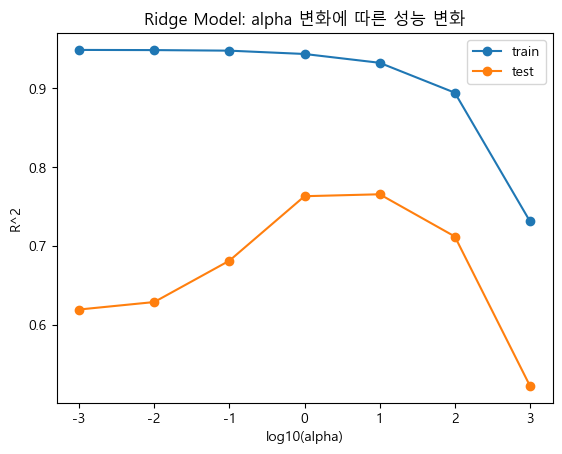

In [231]:
# 위 DataFrame을 plotting해본다.

plt.plot(np.log10(df_r.index), df_r.train, label = 'train', marker = 'o')
plt.plot(np.log10(df_r.index), df_r.test, label = 'test', marker = 'o')

plt.title('Ridge Model: alpha 변화에 따른 성능 변화')
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')

plt.legend()
plt.show()

In [ ]:
# alpha의 크기를 작게 할수록 model이 복잡해져 overfitting이 발생한다.
# alpha의 크기를 크게 할수록 model이 단순해져 underfitting이 발생한다.

##### lasso 의 alpha값 변화에 따른 R square 확인

In [220]:
# alpha의 값을 가지고 있는 list를 생성한다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# alpha에 따른 model의 R^2 결과를 담을 list를 생성한다.
r2_train_list_l = []
r2_test_list_l = []

for alpha in alpha_list:
    # Lasso model 생성 및 학습
    lasso = Lasso(alpha = alpha, random_state = 0)
    lasso.fit(X_train_scaled_poly, y_train)
    
    # model의 예측 결과 생성
    pred_train = lasso.predict(X_train_scaled_poly)
    pred_test = lasso.predict(X_test_scaled_poly)
    
    # model의 성능 평가
    r2_train_list_l.append(r2_score(y_train, pred_train))
    r2_test_list_l.append(r2_score(y_test, pred_test))

C:\Users\8roke\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.014e+02, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\8roke\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.323e+00, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(


In [221]:
df_l = pd.DataFrame({'train': r2_train_list_l, 'test':r2_test_list_l}, index = alpha_list)
df_l

,train,test
0.001,0.947619,0.659395
0.010,0.939512,0.765954
0.100,0.902491,0.724998
1.000,0.797664,0.644639
10.000,0.008417,0.010590
100.000,0.000000,-0.001890
1000.000,0.000000,-0.001890


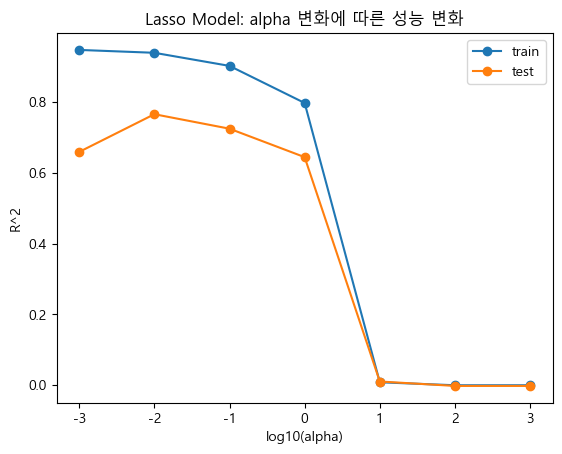

In [232]:
# 위 DataFrame을 plotting해본다.

plt.plot(np.log10(df_l.index), df_l.train, label = 'train', marker = 'o')
plt.plot(np.log10(df_l.index), df_l.test, label = 'test', marker = 'o')

plt.title('Lasso Model: alpha 변화에 따른 성능 변화')
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')

plt.legend()
plt.show()

In [ ]:
# alpha의 크기를 작게 할수록 model이 복잡해져 overfitting이 발생한다.
# alpha의 크기를 크게 할수록 model이 단순해져 underfitting이 발생한다.

## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{ElastcNet_loss_function}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

- r을 이용해 ridge와 lasso 중 더 중요하게 사용할 것을 결정한다.

In [ ]:
# parameter
    # l1_ratio: L1 norm의 비율을 정한다. 즉 loss function에서 r의 값을 입력받는 것이다.
    # alpha

In [234]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [238]:
alpha_list = [0.01, 0.1, 1, 10, 100]
r_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

e_net = ElasticNet(random_state = 0)

params = {
    'l1_ratio': r_list, 
    'alpha': alpha_list
}

gs = GridSearchCV(estimator = e_net, 
                  param_grid = params, 
                  scoring = 'r2', 
                  cv = 4, 
                  n_jobs = -1)

gs.fit(X_train_scaled_poly, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='r2')

In [239]:
gs.best_params_

{'alpha': 0.1, 'l1_ratio': 0.2}

In [241]:
gs.best_score_

0.8565972907373953

In [243]:
result_df = pd.DataFrame(gs.cv_results_)
result_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
10,0.006250,0.000433,0.000626,0.000414,0.1,0.2,"{'alpha': 0.1, 'l1_ratio': 0.2}",0.899531,0.787799,0.830967,0.908093,0.856597,0.049712,1
9,0.007877,0.001885,0.001000,0.000707,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",0.899079,0.790348,0.825952,0.909039,0.856105,0.049704,2
11,0.005510,0.001223,0.000501,0.000501,0.1,0.3,"{'alpha': 0.1, 'l1_ratio': 0.3}",0.899428,0.785110,0.831945,0.906495,0.855744,0.050099,3
12,0.004379,0.000956,0.000750,0.000829,0.1,0.4,"{'alpha': 0.1, 'l1_ratio': 0.4}",0.899368,0.782194,0.830459,0.904659,0.854170,0.050830,4
13,0.003748,0.000434,0.000750,0.000433,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",0.898742,0.778316,0.829445,0.902813,0.852329,0.051731,5


In [242]:
best_model = gs.best_estimator_

pred_test = best_model.predict(X_test_scaled_poly)

r2_score(y_test, pred_test)

0.7425220273454194

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 전체 feature의 일부분일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.